In [38]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from config import PROJECT_ROOT

In [39]:
# Function to load data from a CSV file
def load_data_from_csv(file_path):
    with open(file_path, 'r') as csv_file:
        reader = csv.DictReader(csv_file)
        data = [row for row in reader]
    return data

In [40]:
loss_logs_dir = PROJECT_ROOT.joinpath("loss_logs")
loss_logs = os.listdir(loss_logs_dir)
loss_logs.sort()
# Get the latest loss file
latest_logs = loss_logs[-1]

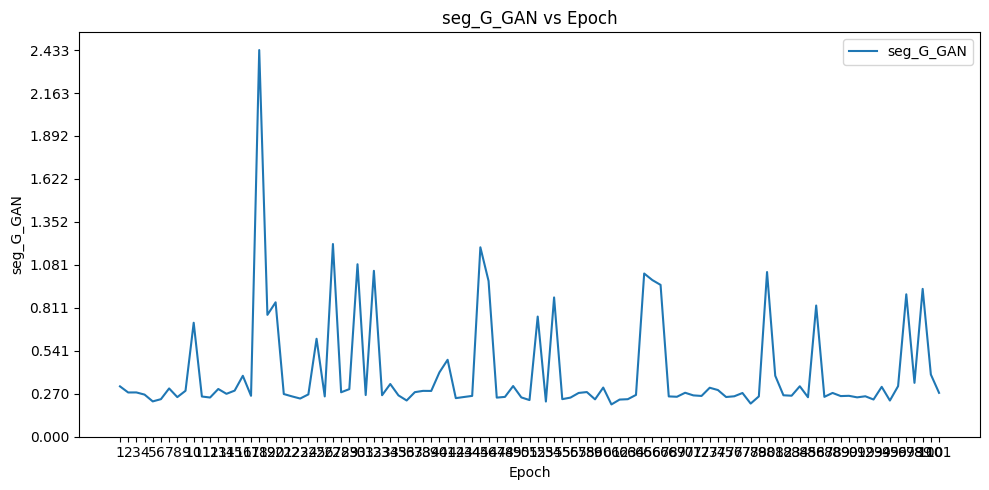

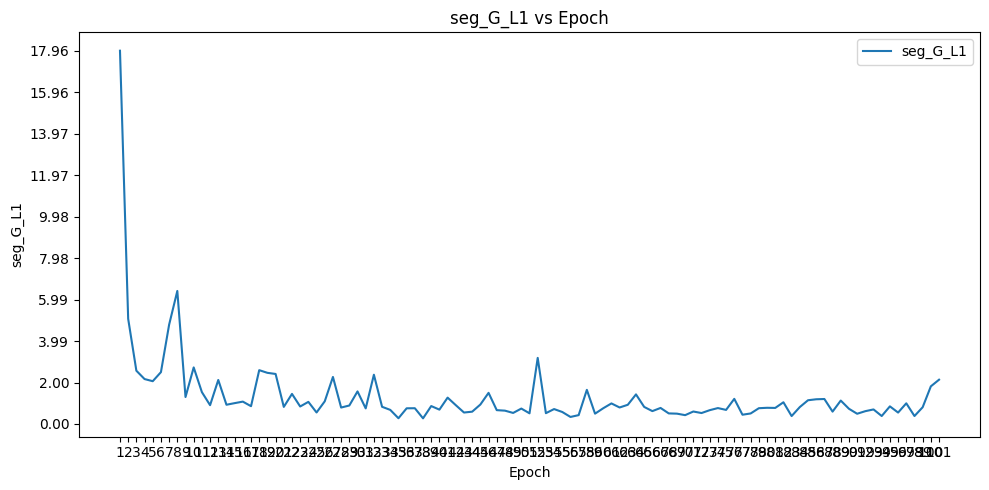

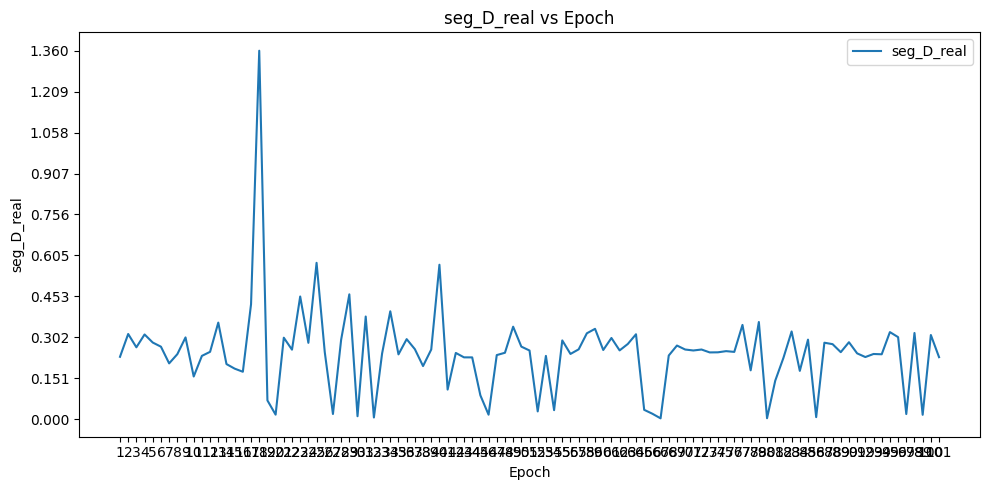

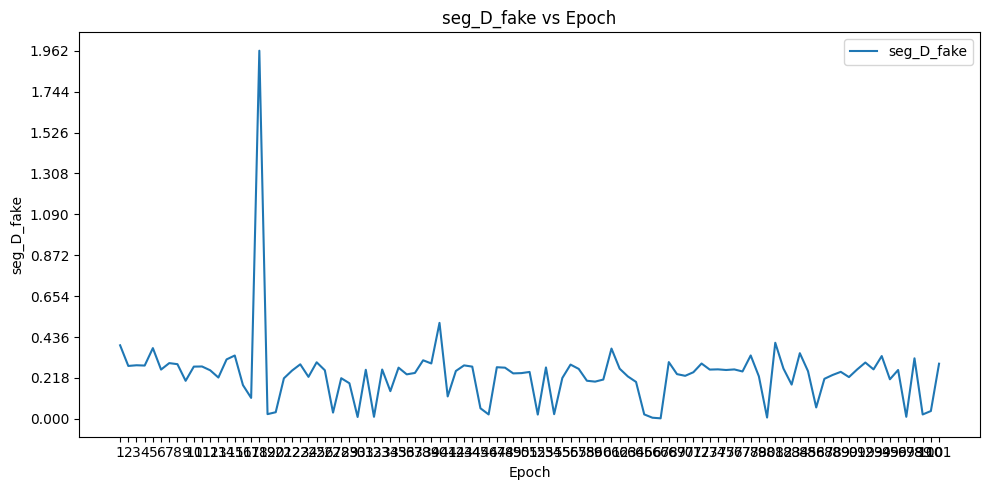

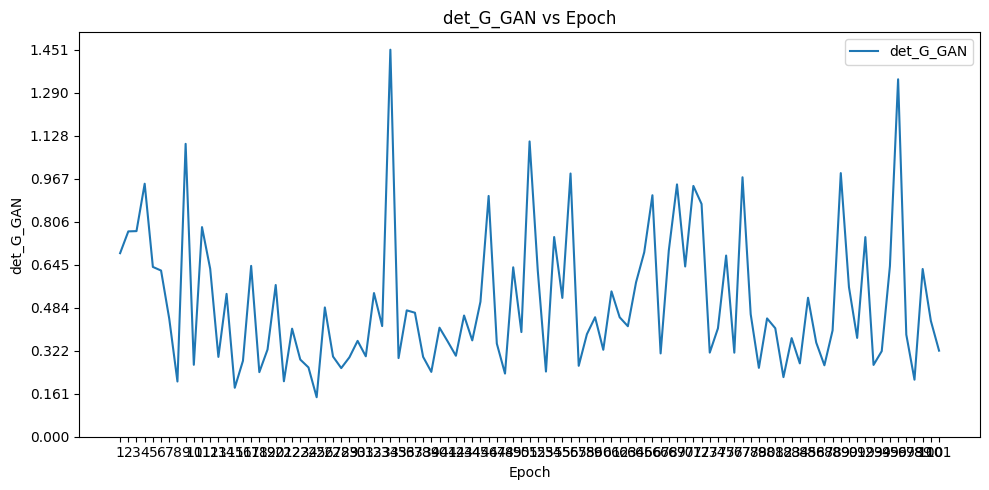

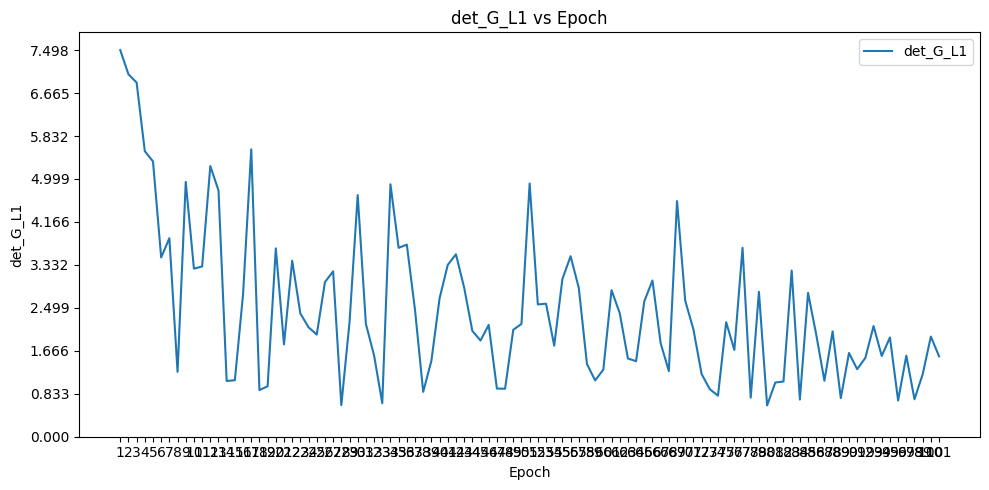

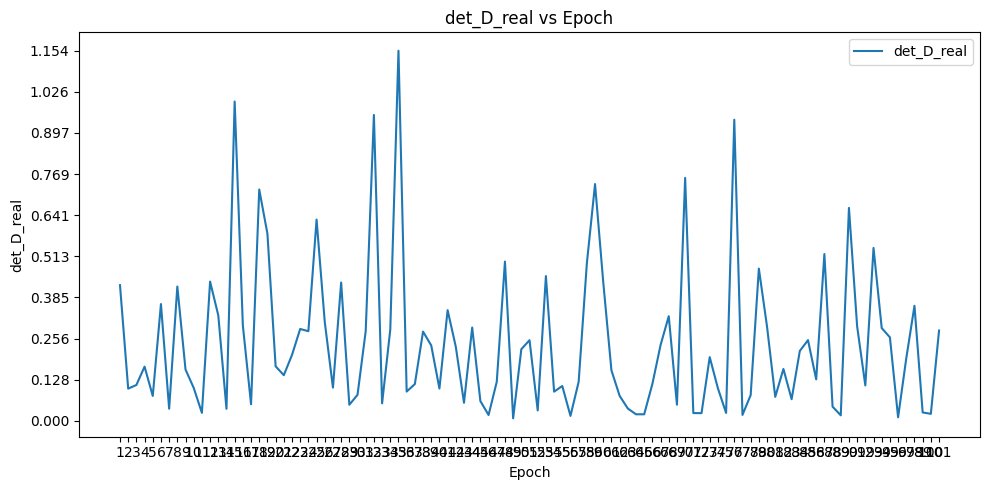

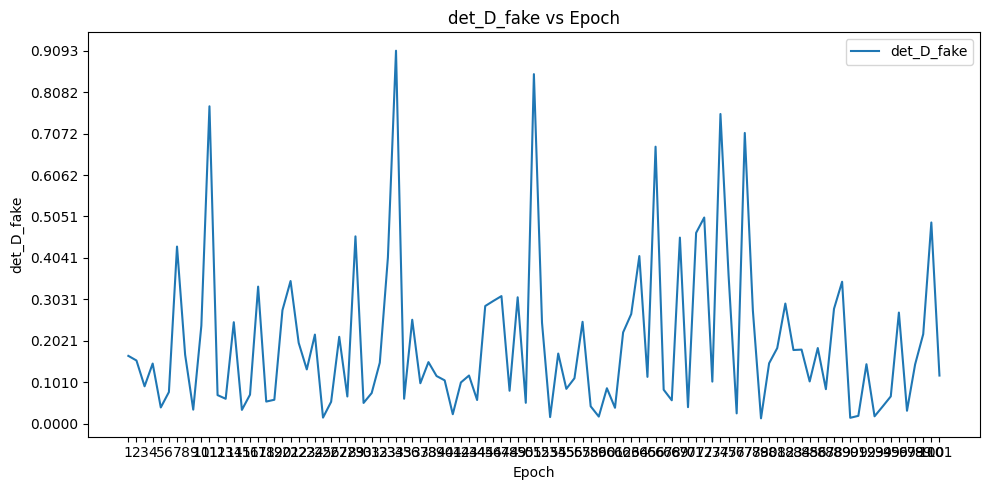

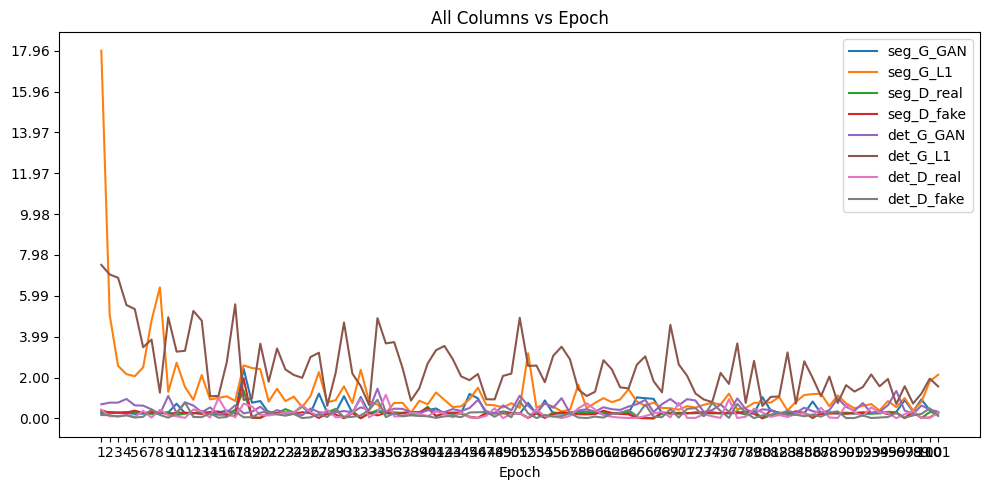

In [41]:
data = load_data_from_csv(loss_logs_dir.joinpath(latest_logs))
# Extract column names from the first row
column_names = list(data[0].keys())

# Separate graph for each column
for column in column_names[1:]:  # Exclude 'epoch'
    y_values = [float(entry[column]) for entry in data]

    plt.figure(figsize=(10, 5))
    plt.plot([entry['epoch'] for entry in data], y_values, label=column)
    plt.title(f'{column} vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel(column)

    # Set y-axis ticks evenly spaced between min and max
    plt.yticks(np.linspace(0, max(y_values), 10))
    plt.tight_layout()
    plt.legend()
    plt.show()

# Single graph for all columns (except 'epoch')
plt.figure(figsize=(10, 5))
max_y = 0
for column in column_names[1:]:  # Exclude 'epoch'
    y_values = [float(entry[column]) for entry in data]
    max_y = max(y_values + [max_y])
    plt.plot([entry['epoch'] for entry in data], y_values, label=column)

plt.yticks(np.linspace(0, max_y, 10))   

plt.title('All Columns vs Epoch')
plt.xlabel('Epoch')
plt.tight_layout()
plt.legend()
plt.show()